# Pair Programming Estandarización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings.

Happy coding 📈📊📉

In [2]:
sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales3.csv")
sales.head(7)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-11-01,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-12-01,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-07-01,Coffee,Columbian,Regular
5,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1139.0,90.0,80.0,130.0,210.0,2,2011-08-01,Coffee,Columbian,Regular
6,203,Connecticut,East,Small Market,135.0,155.0,275.0,103.0,64.0,33.0,1130.0,110.0,90.0,150.0,240.0,2,2011-09-01,Coffee,Columbian,Regular


Empleamos el método StandardScaler para estandarizar todas las variables numéricas.

In [3]:
scaler = StandardScaler()

In [4]:
numericas = sales.select_dtypes(include=np.number)

In [5]:
scaler.fit(numericas)

StandardScaler()

In [6]:
x_escaladas = scaler.transform(numericas)

In [7]:
numericas_standard = pd.DataFrame(x_escaladas, columns = numericas.columns)
numericas_standard.head()

,area_code,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid
0,-1.715303,1.183436,1.838441,1.848071,1.524222,0.996359,0.816717,1.012724,1.508746,1.381111,1.534010,1.658536,-1.333921
1,-1.715303,0.519585,1.006729,0.973139,0.756439,0.584843,0.270314,1.641008,0.994615,0.579395,0.937081,0.896287,-1.333921
2,-1.715303,1.494616,2.223868,2.279008,1.937644,1.179255,1.059562,1.593718,2.022876,1.381111,1.931963,1.912618,-1.333921
3,-1.715303,1.141945,1.797869,1.808895,1.494692,0.996359,0.756005,1.701810,1.508746,1.113872,1.534010,1.531494,-1.333921
4,-1.715303,1.121200,1.006729,0.947022,0.756439,0.401947,0.270314,1.641008,0.994615,0.579395,0.937081,0.896287,-1.333921


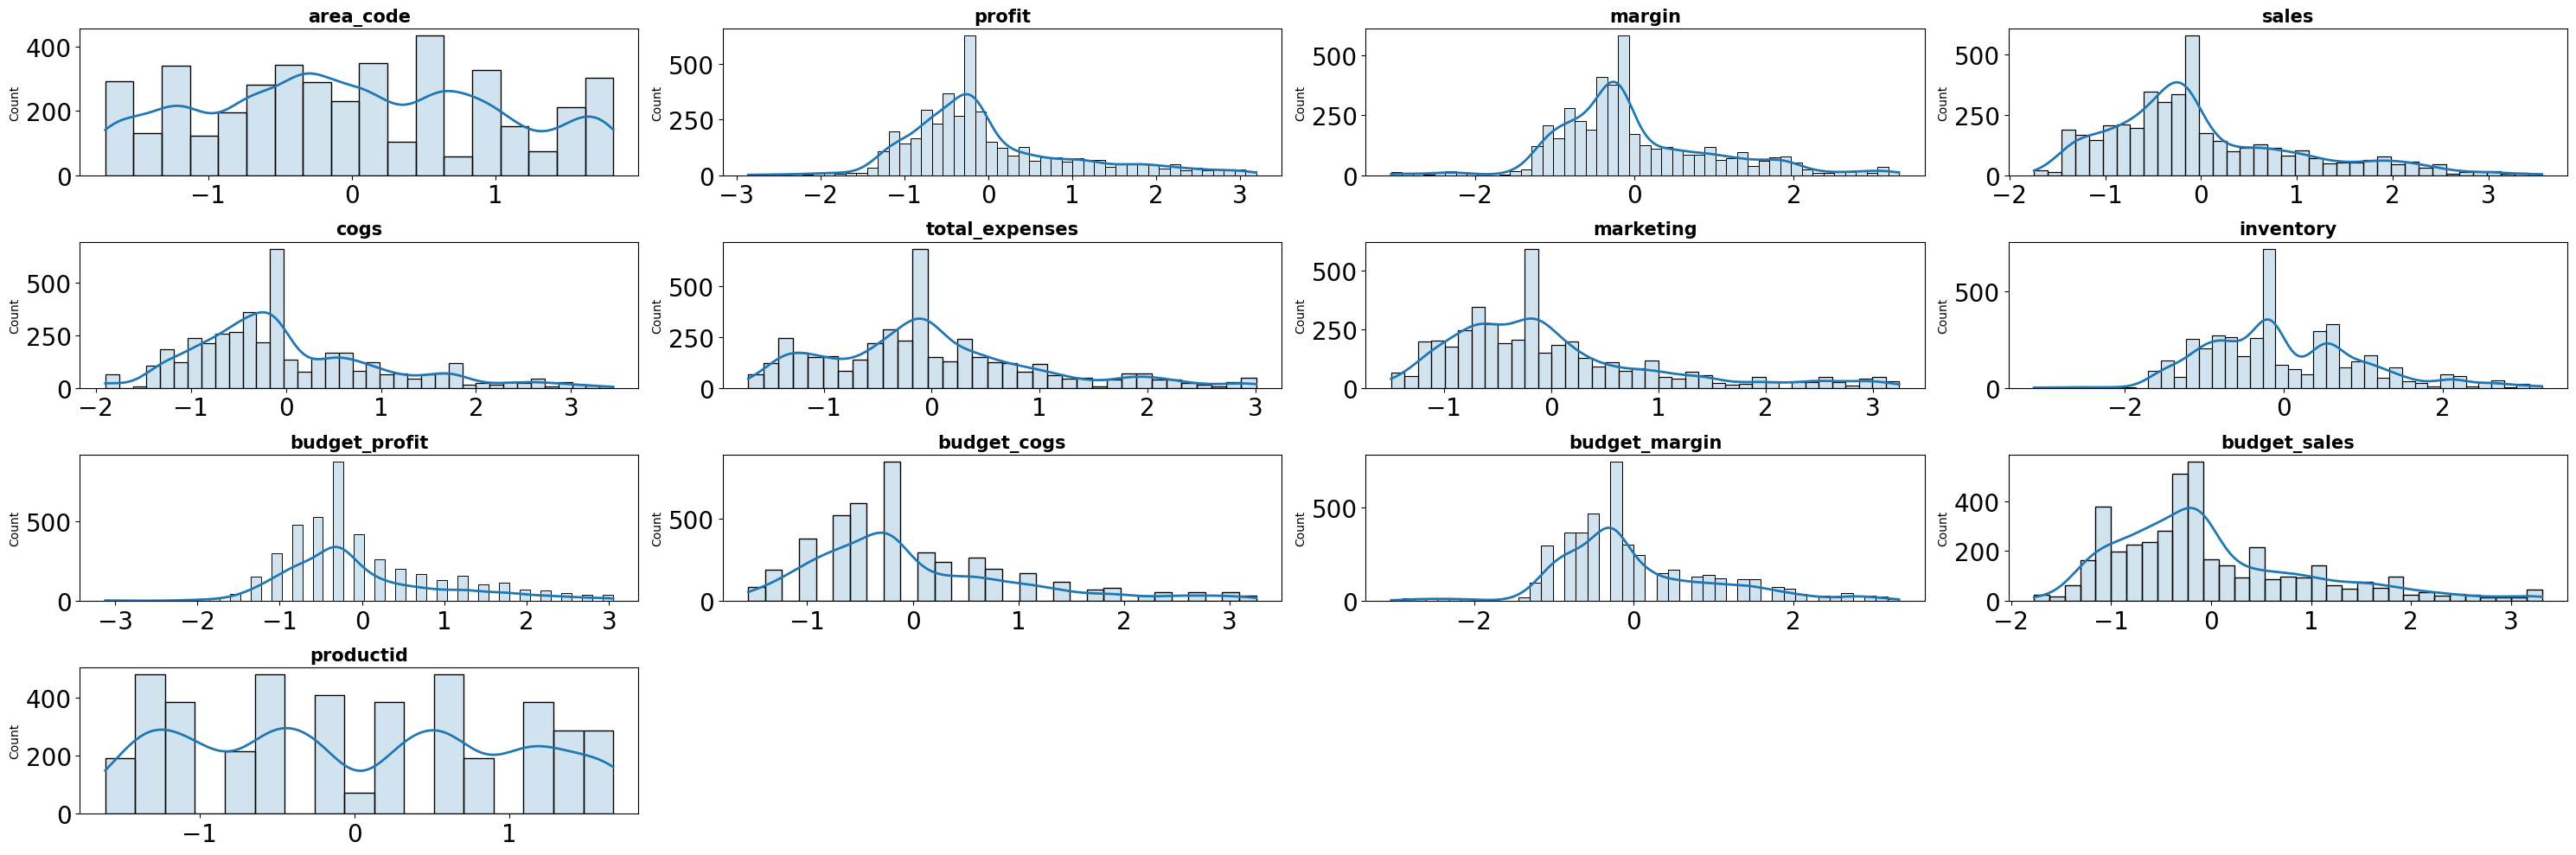

In [8]:
# comprobamos visualmente los resultados:

fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_estandar = numericas_standard.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_standard,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


fig.tight_layout()

fig.delaxes(axes[-1]) 
fig.delaxes(axes[-2]) 
fig.delaxes(axes[-3]) 

Probamos con el método RobustScaler para ver las diferencias con el método anterior.

In [9]:
robust = RobustScaler()

In [10]:
robust.fit(numericas)

RobustScaler()

In [11]:
x_robust = robust.transform(numericas)

In [12]:

numericas_robust = pd.DataFrame(x_robust, columns = numericas.columns)
numericas_robust.head(2)

,area_code,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid
0,-1.042254,1.313725,1.818182,1.711111,1.40,0.92,0.941176,0.879487,1.75,1.2,1.5,1.4,-0.666667
1,-1.042254,0.686275,1.072727,0.966667,0.75,0.56,0.411765,1.356410,1.25,0.6,1.0,0.8,-0.666667


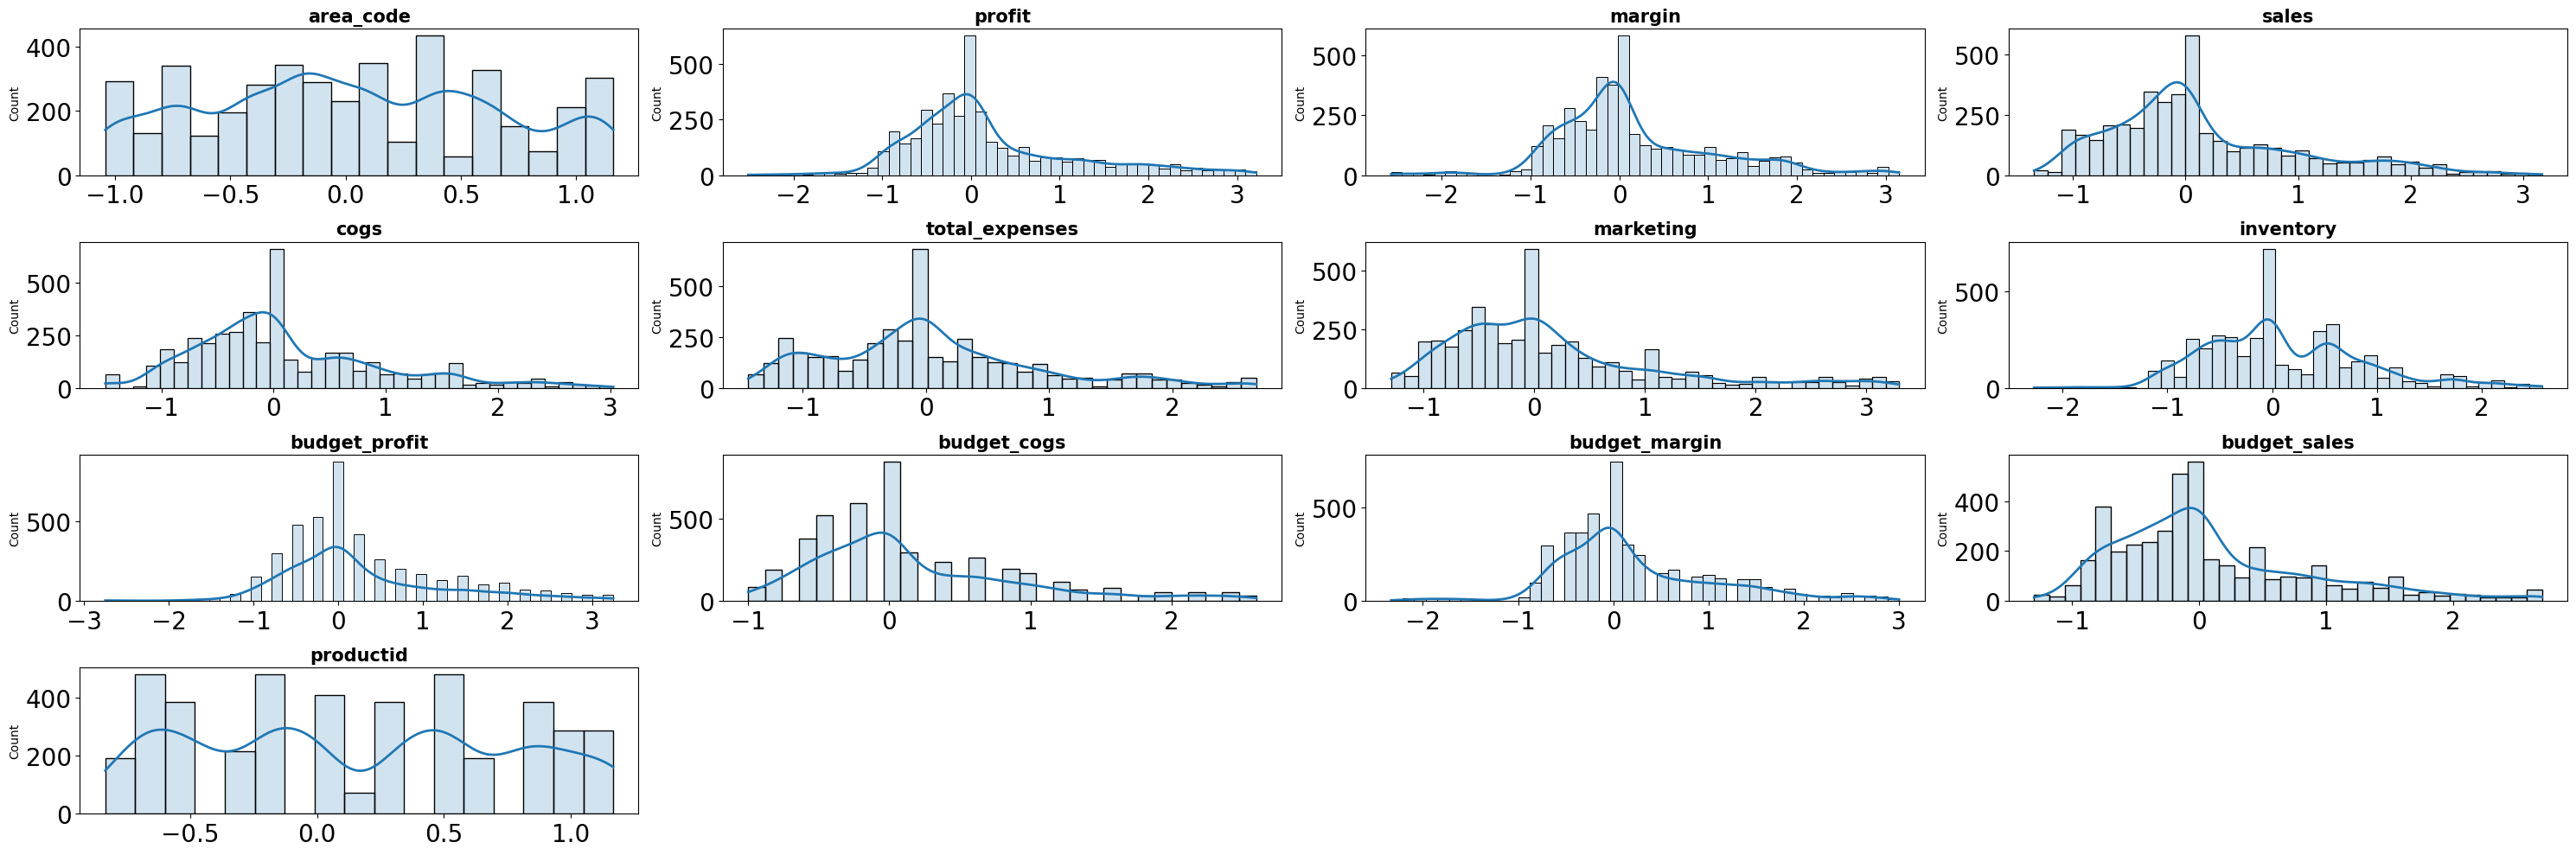

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


fig.tight_layout()

fig.delaxes(axes[-1]) 
fig.delaxes(axes[-2]) 
fig.delaxes(axes[-3]) 

La única diferencia que apreciamos tras aplicar ambos métodos de estandarización es la escala. Por una parte, el método StardardScaler actúa según la media (0) y la desviación estándard (1) y el RobustScaler tiene en cuenta la mediana y los rangos intercuartilicos de nuestras columnas. En principio vemos que este segundo modelo se puede ajustar más a nustros datos, ya que tenemos muchos outliers.